
image 1/1 c:\Repositorios\ClassicalCV\ProjetosOPENCV\YoloLesionDetection\lesion.jpg: 448x640 1 Malignant, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
tensor([250.0779,  90.6945, 359.7914, 243.1896], device='cuda:0')


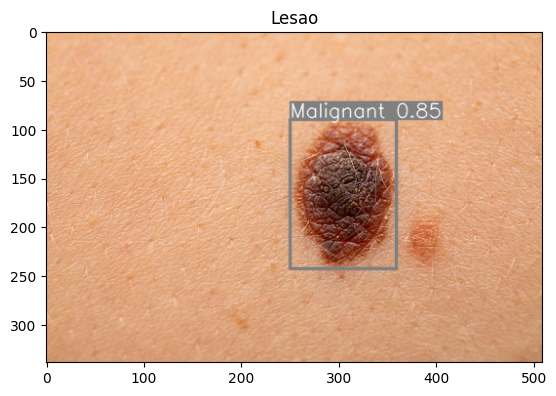

In [4]:
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator
import cv2
import matplotlib.pyplot as plt

def imshow(titulo = 'Imagem', imagem = None, size = 10):
    w, h = imagem.shape[0], imagem.shape[1]
    aspect = w/h
    plt.Figure(figsize=(size * aspect, size))
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.show()

model = YOLO('best.pt') # https://github.com/tamaraabuhawileh/Skin-Cancer-Object-Detection-YOLO

results = model('lesion.jpg')
img = cv2.imread('lesion.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
annotator = Annotator(img)
for r in results:
    for box in r.boxes:
        b = box.xyxy[0]
        print(b)
        c = box.cls
        annotator.box_label(b, f"{r.names[int(c)]} {float(box.conf):.2}")

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
imshow("Lesao", img)